<a href="https://colab.research.google.com/github/kleczekr/tolkenizer/blob/master/cumbria_district_councils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('seaborn') # optional: for ggplot-like style

In [2]:
# This cell is meant to accommodate the Google Colab way of dealing with reading 
# files from Google Drive; feel free to ignore it if you are running the notebook
# on your local machine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_cumbria = pd.read_csv('/content/drive/My Drive/six_district_councils.csv')

In [4]:
df_cumbria.head()

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
0,E07000031,4255,southlakes,PROBRAND LTD,2019-08-07,76.00,PROBRAND LTD,PROBRAND,PROBRAND LIMITED,02653446,NaN,62020.0,3.0
1,E07000031,4256,southlakes,PROBRAND LTD,2019-08-07,2447.75,PROBRAND LTD,PROBRAND,PROBRAND LIMITED,02653446,NaN,62020.0,3.0
2,E07000031,4257,southlakes,FURNESS FLUID POWER LTD,2019-08-05,53.40,FURNESS FLUID POWER LTD,FURNESS FLUID POWER,FURNESS FLUID POWER LIMITED,05675728,NaN,22190.0,3.0
3,E07000031,4258,southlakes,FURNESS FLUID POWER LTD,2019-08-05,5.82,FURNESS FLUID POWER LTD,FURNESS FLUID POWER,FURNESS FLUID POWER LIMITED,05675728,NaN,22190.0,3.0
4,E07000031,4259,southlakes,Bloom Procurement Services Ltd,2019-08-07,6402.04,BLOOM PROCUREMENT SERVICES LTD,BLOOM PROCUREMENT SERVICES,BLOOM PROCUREMENT SERVICES LTD,08045123,NaN,70229.0,1.0


In [5]:
df_cumbria.describe()

,nwod_id,amount,charity_number,sicc_int,match_method
count,27847.000000,27846.000000,0.0,19771.000000,27847.000000
mean,4009.159191,3868.358883,NaN,55480.046836,2.464039
std,2250.927066,17398.617763,NaN,23106.098364,2.157360
min,1.000000,-37500.000000,NaN,0.000000,0.000000
25%,2145.000000,137.000000,NaN,38210.000000,1.000000
50%,3963.000000,582.870000,NaN,58130.000000,3.000000
75%,5703.500000,1892.627500,NaN,74909.000000,3.000000
max,8886.000000,481805.530000,NaN,99999.000000,9.000000


In [6]:
df_cumbria.tail()

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
27842,E07000031,6834,southlakes,CUMBRIA WASTE RECYCLING LTD,2019-12-19,254.46,CUMBRIA WASTE RECYCLING LTD,CUMBRIA WASTE RECYCLING,CUMBRIA WASTE RECYCLING LIMITED,03162439,NaN,38110.0,3.0
27843,E07000031,6835,southlakes,CUMBRIA WASTE RECYCLING LTD,2019-12-16,123.12,CUMBRIA WASTE RECYCLING LTD,CUMBRIA WASTE RECYCLING,CUMBRIA WASTE RECYCLING LIMITED,03162439,NaN,38110.0,3.0
27844,E07000031,6836,southlakes,Landlord,2019-12-16,536.98,LANDLORD,LANDLORD,LANDLORD LIMITED,01899363,NaN,68209.0,3.0
27845,E07000031,6837,southlakes,Landlord,2019-12-16,415.00,LANDLORD,LANDLORD,LANDLORD LIMITED,01899363,NaN,68209.0,3.0
27846,E07000031,6838,southlakes,Landlord,2019-12-16,700.00,LANDLORD,LANDLORD,LANDLORD LIMITED,01899363,NaN,68209.0,3.0


In [7]:
df_cumbria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27847 entries, 0 to 27846
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nwod_id_uri_code  27847 non-null  object 
 1   nwod_id           27847 non-null  int64  
 2   org_short_name    27847 non-null  object 
 3   beneficiary_name  27847 non-null  object 
 4   payment_date      27534 non-null  object 
 5   amount            27846 non-null  float64
 6   clean_name        27847 non-null  object 
 7   naked_name        27847 non-null  object 
 8   company_name      27847 non-null  object 
 9   company_number    19771 non-null  object 
 10  charity_number    0 non-null      float64
 11  sicc_int          19771 non-null  float64
 12  match_method      27847 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.8+ MB


In [8]:
# convert the payment_date column to datetime
df_cumbria['payment_date']= pd.to_datetime(df_cumbria['payment_date']) 

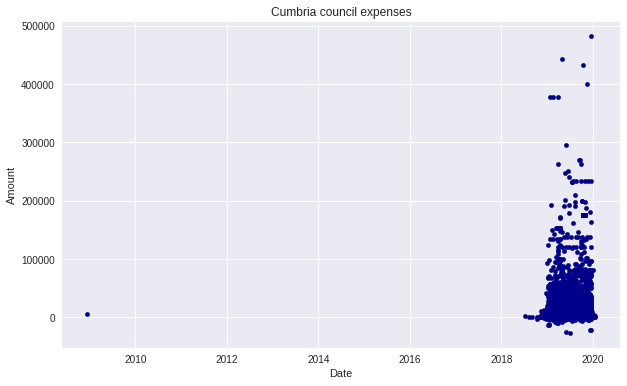

In [9]:
# scatterplot of expenses against time

df_cumbria.plot(kind='scatter', x='payment_date', y='amount', figsize=(10, 6), color='darkblue')

plt.title('Cumbria council expenses')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.show()

The scatterplot is hardly informative, largely due to a single outlier---a payment from the year 2009. It would be interesting to take a closer look at this single payment:

In [10]:
df_cumbria[df_cumbria.payment_date < '2010-01-01']

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
2401,E07000030,1707,eden,TIAA LTD,2008-12-13,5900.0,TIAA LTD,TIAA,TIAA LIMITED,04546319,NaN,69201.0,3.0


It might be better to omit this single expenditure in a visualization---let's try that:

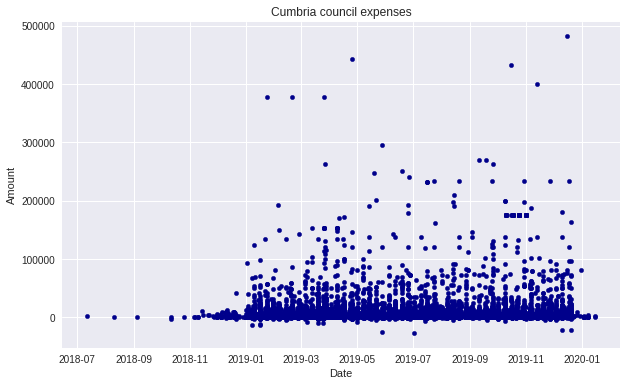

In [11]:
df_cumbria[df_cumbria.payment_date > '2010-01-01'].plot(kind='scatter', x='payment_date', y='amount', figsize=(10, 6), color='darkblue')

plt.title('Cumbria council expenses')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.show()

The dataset seems to be listing a few expenditures before November 2018, but regular data seems to be included only for the year 2019. Let's take a closer look at the transactions listed for the months outside of the main scope of the data---all of them seem to be of rather low amounts:

In [12]:
# mask = (df_cumbria.payment_date < '2019-01-01') & (df_cumbria.payment_date > '2019-12-31')
# df_cumbria_irreg = df_cumbria.loc[mask]

In [13]:
# df_cumbria_irreg.info()

In [14]:
# df_cumbria_irreg.head()

In [15]:
df_cumbria[df_cumbria.payment_date > '2019-12-31']

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
11472,E07000026,5843,allerdale,MIDTOWN HOUSE LIMITED,2020-01-03,60.66,MIDTOWN HOUSE LIMITED,MIDTOWN HOUSE,MIDTOWN HOUSE LIMITED,04662111,NaN,87100.0,1.0
12269,E07000026,5840,allerdale,MIDTOWN HOUSE LIMITED,2020-01-03,60.66,MIDTOWN HOUSE LIMITED,MIDTOWN HOUSE,MIDTOWN HOUSE LIMITED,04662111,NaN,87100.0,1.0
12270,E07000026,5841,allerdale,MIDTOWN HOUSE LIMITED,2020-01-03,196.30,MIDTOWN HOUSE LIMITED,MIDTOWN HOUSE,MIDTOWN HOUSE LIMITED,04662111,NaN,87100.0,1.0
12271,E07000026,5842,allerdale,MIDTOWN HOUSE LIMITED,2020-01-03,60.66,MIDTOWN HOUSE LIMITED,MIDTOWN HOUSE,MIDTOWN HOUSE LIMITED,04662111,NaN,87100.0,1.0
12290,E07000026,5844,allerdale,MIDTOWN HOUSE LIMITED,2020-01-03,196.30,MIDTOWN HOUSE LIMITED,MIDTOWN HOUSE,MIDTOWN HOUSE LIMITED,04662111,NaN,87100.0,1.0
12436,E07000026,5664,allerdale,LAKES COLLEGE WEST CUMB,2020-01-03,65.00,LAKES COLLEGE WEST CUMB,LAKES COLLEGE WEST CUMB,LAKES COLLEGE WEST CUMBRIA,NaN,NaN,NaN,9.0
12490,E07000026,5715,allerdale,LAVAT CONSULTING LTD T/A PSTAX,2020-01-08,3800.00,LAVAT CONSULTING LTD T/A PSTAX,LAVAT CONSULTING,LAVAT CONSULTING LIMITED,04810070,NaN,69203.0,3.0
12505,E07000026,5730,allerdale,VIVID RESOURCING,2020-01-08,1260.00,VIVID RESOURCING,VIVID RESOURCING,VIVID RESOURCING LIMITED,06459262,NaN,78200.0,3.0
12529,E07000026,5755,allerdale,EE LIMITED,2020-01-08,21.00,EE LIMITED,EE,EE LIMITED,02382161,NaN,61900.0,1.0
12546,E07000026,5771,allerdale,DUNDAS CHEMICAL CO (MOSSPARK),2020-01-08,18.50,DUNDAS CHEMICAL CO (MOSSPARK),DUNDAS CHEMICAL CO MOSSPARK,DUNDAS CHEMICAL CO (MOSSPARK),NaN,NaN,NaN,0.0


In [16]:
df_cumbria[df_cumbria.payment_date < '2019-01-01']

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
2344,E07000030,1652,eden,GREENWICH LEISURE LTD,2018-12-10,8687.85,GREENWICH LEISURE LTD,GREENWICH LEISURE,GREENWICH LEISURE LTD,IP27793R,NaN,0.0,1.0
2345,E07000030,1653,eden,GREENWICH LEISURE LTD,2018-12-10,8687.85,GREENWICH LEISURE LTD,GREENWICH LEISURE,GREENWICH LEISURE LTD,IP27793R,NaN,0.0,1.0
2346,E07000030,1654,eden,GREENWICH LEISURE LTD,2018-12-10,8687.85,GREENWICH LEISURE LTD,GREENWICH LEISURE,GREENWICH LEISURE LTD,IP27793R,NaN,0.0,1.0
2347,E07000030,1655,eden,GREENWICH LEISURE LTD,2018-12-10,8687.85,GREENWICH LEISURE LTD,GREENWICH LEISURE,GREENWICH LEISURE LTD,IP27793R,NaN,0.0,1.0
2348,E07000030,1656,eden,GREENWICH LEISURE LTD,2018-12-10,8687.85,GREENWICH LEISURE LTD,GREENWICH LEISURE,GREENWICH LEISURE LTD,IP27793R,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,E07000031,81,southlakes,EE UK LTD (NCR),2018-12-05,140.00,EE UK LTD (NCR),EE UK,EE UK LTD (NCR),NaN,NaN,NaN,0.0
4043,E07000031,82,southlakes,EE UK LTD (NCR),2018-12-05,342.80,EE UK LTD (NCR),EE UK,EE UK LTD (NCR),NaN,NaN,NaN,0.0
4045,E07000031,83,southlakes,EE UK LTD (NCR),2018-12-05,11.45,EE UK LTD (NCR),EE UK,EE UK LTD (NCR),NaN,NaN,NaN,0.0
4086,E07000031,123,southlakes,J-TOURISM INC. (CHAPS),2018-12-05,5472.00,J-TOURISM INC. (CHAPS),J-TOURISM INC. CHAPS,J-TOURISM INC. (CHAPS),NaN,NaN,NaN,0.0


It seems that there are only a few payments recorded for the beginning of 2020, all for relatively low amounts. There are 89 payments recorded for the period before 2019, primarily for December 2018. Are there empty values in the date column? The summary seems to indicate that---let's see them:

In [17]:
df_cumbria[df_cumbria.payment_date.isnull()]

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
520,E07000029,6471,copeland,ARTHUR MCKAY + CO LTD,NaT,-801.50,ARTHUR MCKAY + CO LTD,ARTHUR MCKAY + CO,ARTHUR MCKAY + CO LTD,NaN,NaN,NaN,0.0
618,E07000029,6570,copeland,RENTOKIL INITIAL UK LTD,NaT,-657.12,RENTOKIL INITIAL UK LTD,RENTOKIL INITIAL UK,RENTOKIL INITIAL UK LTD,00301044,NaN,82990.0,1.0
1141,E07000029,7094,copeland,WHITEHAVEN HARBOUR COMMISSIONERS,NaT,-2104.80,WHITEHAVEN HARBOUR COMMISSIONERS,WHITEHAVEN HARBOUR COMMISSIONERS,WHITEHAVEN HARBOUR COMMISSIONERS,NaN,NaN,NaN,9.0
1239,E07000029,7191,copeland,Croner-I Limited,NaT,-765.51,CRONER-I LIMITED,CRONER-I,CRONER-I LIMITED,10878116,NaN,58110.0,1.0
1247,E07000029,7199,copeland,Atkins Limited,NaT,3000.00,ATKINS LIMITED,ATKINS,ATKINS LIMITED,00688424,NaN,70229.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12531,E07000026,5757,allerdale,BARCLAYCARD COMMERCIAL,NaT,390.85,BARCLAYCARD COMMERCIAL,BARCLAYS BANK,BARCLAYS BANK PLC,01026167,NaN,64110.0,3.0
12532,E07000026,5758,allerdale,BARCLAYCARD COMMERCIAL,NaT,23.94,BARCLAYCARD COMMERCIAL,BARCLAYS BANK,BARCLAYS BANK PLC,01026167,NaN,64110.0,3.0
12533,E07000026,5759,allerdale,BARCLAYCARD COMMERCIAL,NaT,603.55,BARCLAYCARD COMMERCIAL,BARCLAYS BANK,BARCLAYS BANK PLC,01026167,NaN,64110.0,3.0
12694,E07000026,5836,allerdale,VAADHOO LIMITED,NaT,900.00,VAADHOO LIMITED,VAADHOO,VAADHOO LIMITED,09465098,NaN,62090.0,1.0


That's a lot of payments! Let's group these undated payments by the beneficiary:

In [18]:
df_cumbria[df_cumbria.payment_date.isnull()].groupby(['beneficiary_name']).amount.sum()

beneficiary_name
A & C WEBER UK LIMITED                    6732.00
ABC FOOD LAW LTD                           195.00
ADT FIRE & SECURITY PLC                    -37.22
ALCIUM SOFTWARE LTD                       5977.00
ALTIATECH LTD                             3360.00
                                           ...   
WHITEHAVEN HARBOUR COMMISSIONERS         -2104.80
WHITESPACE WORK SOFTWARE                  5091.99
WORKING PLANET LIMITED                     199.00
WYG ENVIRONMENT PLANNING TRANSPORT LTD    4200.00
YORK SURVEY SUPPLY CENTRE LTD              395.00
Name: amount, Length: 110, dtype: float64

Grouping by beneficiary might be a way to go for the entire dataframe. Let's do this and display the top thirty beneficiaries:

In [19]:
beneficiaries = df_cumbria.groupby(['beneficiary_name']).amount.sum()

In [20]:
beneficiaries.sort_values(ascending=False).head(30)

beneficiary_name
FCC ENVIRONMENT SERVICES (FOCSA)       3707841.01
AMEY PLC                               3213025.98
DENNIS EAGLE LIMITED                   2603010.25
FCC Enviroment Services (UK) Ltd       2086666.98
ELECTRICITY NORTH WEST LTD             1842996.56
EQUITIX (COPELAND) LTD                 1767951.79
CUMBRIA WASTE RECYCLING LTD            1757806.93
CUMBRIA COUNTY COUNCIL                 1637359.31
Hughes Brothers                        1588185.25
TIVOLI GROUP LTD                       1275567.15
Thomas Armstrong Construction Ltd      1139339.57
Continental Landscapes Ltd             1085304.75
Thomas Armstrong (Construction) Ltd    1053054.07
GO PLANT FLEET SERVICES LTD             949711.79
VENN GROUP LIMITED                      924525.22
CONTINENTAL LANDSCAPES LTD              856216.81
GREENWICH LEISURE LTD                   774637.94
PRINT IMAGE NETWORK LTD                 760872.52
DLP Services (Northern) Ltd             757421.44
LAMBERT SMITH HAMPTON GROUP      

The top expenditure seem to be the services of the waste management company FCC Environment Services based in Northampton. Let's see these transactions in detail:

In [21]:
df_focsa = df_cumbria[df_cumbria.beneficiary_name == 'FCC ENVIRONMENT SERVICES (FOCSA)']

In [22]:
df_focsa

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
7175,E07000026,384,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-01-23,378102.25,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
7503,E07000026,712,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-02-20,378102.25,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
7738,E07000026,955,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-03-06,62375.00,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
8045,E07000026,1262,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-03-27,378102.25,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
8201,E07000026,1420,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-03-27,185.04,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
8203,E07000026,1422,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-03-27,114500.00,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
9103,E07000026,2326,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-05-22,45250.05,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
9766,E07000026,2998,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-06-26,22000.00,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
10132,E07000026,3365,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-07-17,232333.34,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0
10133,E07000026,3366,allerdale,FCC ENVIRONMENT SERVICES (FOCSA),2019-07-17,232333.34,FCC ENVIRONMENT SERVICES (FOCSA),FCC ENVIRONMENT SERVICES UK,FCC ENVIRONMENT SERVICES (UK) LIMITED,02375726,NaN,38110.0,3.0


All the payments for FOCSA recorded in the file took place in 2019, in every month with the excetion of January and April. What about the infrastructure support provider AMEY PLC?

In [23]:
df_amey = df_cumbria[df_cumbria.beneficiary_name == 'AMEY PLC']

In [24]:
df_amey

,nwod_id_uri_code,nwod_id,org_short_name,beneficiary_name,payment_date,amount,clean_name,naked_name,company_name,company_number,charity_number,sicc_int,match_method
2361,E07000030,2179,eden,AMEY PLC,2019-04-26,1079.98,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
2367,E07000030,1866,eden,AMEY PLC,2019-03-08,8592.00,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
2371,E07000030,1677,eden,AMEY PLC,2018-12-20,527.80,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
2373,E07000030,1679,eden,AMEY PLC,2018-12-21,530.28,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
2381,E07000030,1687,eden,AMEY PLC,2018-12-04,846.79,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,E07000030,3205,eden,AMEY PLC,2019-12-20,2646.62,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
3950,E07000030,3206,eden,AMEY PLC,2019-12-20,2646.62,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
3951,E07000030,3207,eden,AMEY PLC,2019-12-20,2646.62,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0
3952,E07000030,3208,eden,AMEY PLC,2019-12-20,2646.62,AMEY PLC,AMEY,AMEY PLC,02379479,NaN,70100.0,1.0


That's many more payments of much lower amounts, and paid much more regularly. A bubble plot of these payments might be of some interest.

In [25]:
# normalize FOCSA data:
norm_focsa = (df_focsa.amount - df_focsa.amount.min()) / (df_focsa.amount.max() - df_focsa.amount.min())

# normalize AMEY data:
norm_amey = (df_amey.amount - df_amey.amount.min()) / (df_amey.amount.max() - df_amey.amount.min())

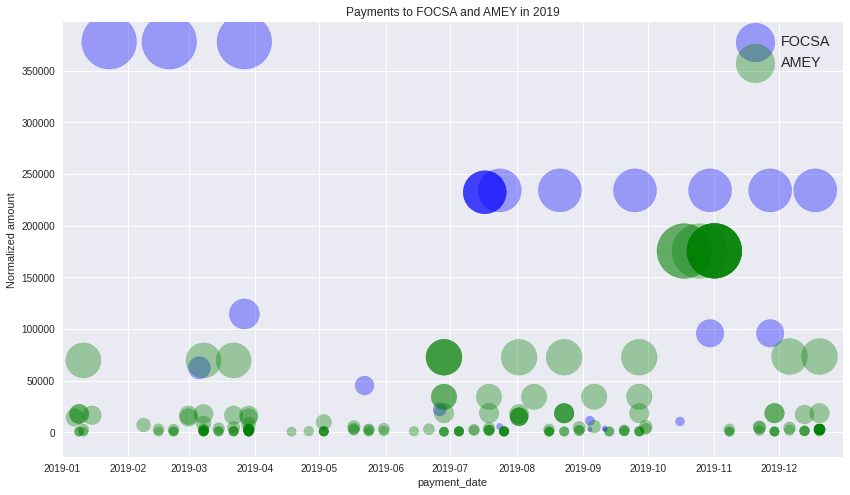

In [26]:
import datetime
# FOCSA
ax0 = df_focsa.plot(kind = 'scatter', 
                    x = 'payment_date',
                    y = 'amount',
                    figsize = (14, 8),
                    alpha = 0.35,
                    color = 'blue',
                    s = norm_focsa * 3000,
                    xlim = (datetime.date(2019, 1, 1), datetime.date(2019, 12, 31)))
                    
# AMEY
ax1 = df_amey.plot(kind = 'scatter',
                    x = 'payment_date',
                    y = 'amount',
                    figsize = (14, 8),
                    alpha = 0.35,
                    color = 'green',
                    s = norm_amey * 3000,
                    ax = ax0)

ax0.set_ylabel('Normalized amount')
ax0.set_title('Payments to FOCSA and AMEY in 2019')
ax0.legend(['FOCSA', 'AMEY'], loc='upper right', fontsize='x-large')

It's somewhat less readable than I wished for---still, it does point out definite tendencies. Payments for AMEY are generally lower in value, but numerous. There is a series of extraordinarily high payments to AMEY in October---early November. Payments to FOCSA are generally high and rare; payments in the first three months covered by the file are especially high. Payments for the months following July seem to be of very similar amounts.